In [ ]:
!pip install transformers
!pip install datasets
!pip install pynvml
!pip install torch
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 85.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.9 MB/s eta 0:00:0

In [ ]:
# ===========================================
# ||                                       ||
# ||       Section 1: Importing modules    ||
# ||                                       ||
# ===========================================
import torch
from pynvml import nvmlInit, nvmlDeviceGetHandleByIndex, nvmlDeviceGetMemoryInfo
from torch import cuda
import gc

# ===========================================
# ||                                       ||
# ||  Section 2: utils functions for gpu   ||
# ||             and device                ||
# ||                                       ||
# ===========================================

def check_gpu_availability():
    # Check if CUDA is available
    print(f"Cuda is available: {torch.cuda.is_available()}")


def getting_device(gpu_prefence=True) -> torch.device:
    """
    This function gets the torch device to be used for computations,
    based on the GPU preference specified by the user.
    """

    # If GPU is preferred and available, set device to CUDA
    if gpu_prefence and torch.cuda.is_available():
        device = torch.device('cuda')
    # If GPU is not preferred or not available, set device to CPU
    else:
        device = torch.device("cpu")

    # Print the selected device
    print(f"Selected device: {device}")

    # Return the device
    return device


# Define a function to print GPU memory utilization
def print_gpu_utilization():
    # Initialize the PyNVML library
    nvmlInit()
    # Get a handle to the first GPU in the system
    handle = nvmlDeviceGetHandleByIndex(0)
    # Get information about the memory usage on the GPU
    info = nvmlDeviceGetMemoryInfo(handle)
    # Print the GPU memory usage in MB
    print(f"GPU memory occupied: {info.used // 1024 ** 2} MB.")


# Define a function to print training summary information
def print_summary(result):
    # Print the total training time in seconds
    print(f"Time: {result.metrics['train_runtime']:.2f}")
    # Print the number of training samples processed per second
    print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
    # Print the GPU memory utilization
    print_gpu_utilization()

def clean_gpu():
    # Get current GPU memory usage
    print("BEFORE CLEANING:")
    print(f"Allocated: {cuda.memory_allocated() / 1024 ** 3:.2f} GB")
    print(f"Cached: {cuda.memory_cached() / 1024 ** 3:.2f} GB")
    print("\n")
    # Free up PyTorch and CUDA memory
    torch.cuda.empty_cache()
    cuda.empty_cache()

    # Run garbage collection to free up other memory
    gc.collect()

    # Get new GPU memory usage
    print("AFTER CLEANING:")
    print(f"Allocated: {cuda.memory_allocated() / 1024 ** 3:.2f} GB")
    print(f"Cached: {cuda.memory_cached() / 1024 ** 3:.2f} GB")

BEFORE CLEANING:
Allocated: 1.25 GB
Cached: 1.36 GB


AFTER CLEANING:
Allocated: 1.25 GB
Cached: 1.36 GB
Cuda is available: True
Selected device: cuda
GPU memory occupied: 2687 MB.


/usr/local/lib/python3.9/dist-packages/torch/cuda/memory.py:395: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


The longest input sequence has value: 84


Map:   0%|          | 0/4872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1218 [00:00<?, ? examples/s]

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

Map:   0%|          | 0/4872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1218 [00:00<?, ? examples/s]

Map:   0%|          | 0/1523 [00:00<?, ? examples/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint a

Selected device: cuda


[I 2023-03-25 11:04:58,950] A new study created in memory with name: no-name-425e6536-4111-4152-9223-030f4e1da4fd


GPU memory occupied: 3883 MB.


<ipython-input-14-c236c4162319>:462: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 1e-5)
<ipython-input-14-c236c4162319>:463: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon_value = trial.suggest_loguniform('epsilon_value', 1e-10, 1e-6)
/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/153 [00:00<?, ?it/s]


  Average training loss: 0.68


  0%|          | 0/153 [00:00<?, ?it/s]


  Average training loss: 0.66


  0%|          | 0/39 [00:00<?, ?it/s]

[I 2023-03-25 11:12:35,127] Trial 0 finished with value: 0.6335434394005017 and parameters: {'learning_rate': 6.300887383667923e-07, 'epsilon_value': 1.809990790212719e-09, 'epochs_num': 2, 'warmup_st': 43}. Best is trial 0 with value: 0.6335434394005017.


Accuracy Score: 0.6995073891625616
Valid_loss: 0.6335434394005017
{'learning_rate': 6.300887383667923e-07, 'epsilon_value': 1.809990790212719e-09, 'epochs_num': 2, 'warmup_st': 43}
 
START TRAINING 
 
Epoch 1
-------------------------------


  0%|          | 0/153 [00:00<?, ?it/s]


  Average training loss: 0.62


  0%|          | 0/39 [00:00<?, ?it/s]

Accuracy Score: 0.7307060755336617
Valid_loss: 0.5942057982469217
Epoch 2
-------------------------------


  0%|          | 0/153 [00:00<?, ?it/s]


  Average training loss: 0.59


  0%|          | 0/39 [00:00<?, ?it/s]

Accuracy Score: 0.7380952380952381
Valid_loss: 0.5861184207292703
DONE TRAINING
 
START TESTING
 


  0%|          | 0/48 [00:00<?, ?it/s]

Accuracy Score: 0.7708470124753776
F1 Score: 0.7638586600381627
Test_loss: 0.5750245247036219
DONE TESTING


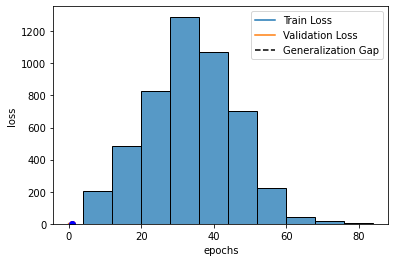

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
# ===========================================
# ||                                       ||
# ||Section 1: Importing modules           ||
# ||                                       ||
# ===========================================

from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import Dataset
from sklearn.model_selection import train_test_split
from transformers import BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
import torch.nn as nn
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
import torchvision.models as models
import optuna
#from utils4gpu import *

clean_gpu()

# ===========================================
# ||                                       ||
# ||Section 2: Utlis 4 Bert                ||
# ||                                       ||
# ===========================================

# FUNCTION 4 MAX LENGTH TO SET TOKENIZER MAX LENGTH

def get_list_of_lengths(text_column, tokenizer) -> int:
    token_lens = []

    for text in text_column:
        # Tokenize the text and add `[CLS]` and `[SEP]` tokens => split in symbolic/textual tokens and map them to integer ids
        tokens = tokenizer.encode(text, add_special_tokens=True)

        # checking the len of tokenized sentence
        token_lens.append(len(tokens))

    return token_lens


def get_max_lenghts(list_len) -> int:
    # PART 1 MAX

    # Convert the list to a PyTorch tensor
    tensor_data = torch.tensor(list_len)

    # getting the argmax index
    argmax_index = tensor_data.argmax().item()

    # getting the argmax

    argmax = list_len[argmax_index]
    print(f"The longest input sequence has value: {argmax}")

    # PART 2 HISTOGRAM

    # importing the library for the visualization
    import seaborn as sns

    # now we want to plot the histogram of the list of integers
    sns.histplot(list_len, bins=10)

    return argmax


# FUNCTION 4 GETTING THE DATASET IN  A FORM 4 PYTORCH

def convert_to_torch(item):
    input_ids = item['input_ids']
    token_type_ids = item['token_type_ids']
    attention_mask = item['attention_mask']
    label = item['labels']
    return {'input_ids': input_ids, 'token_type_ids': token_type_ids, 'attention_mask': attention_mask, 'label': label}

# ===========================================
# ||                                       ||
# ||Section 3: checking gpu, choosing      ||
# ||             device, and model         ||
# ||                                       ||
# ===========================================

# CHECK IF GPU IS UP
check_gpu_availability()

# SAVE THE DEVICE WE ARE WORKING WITH
device = getting_device(gpu_prefence=True)

# SHOULD BE FEW MB
print_gpu_utilization()

# SETTING HF CHECKPOINT/MODEL
model_nm = "bert-large-uncased"

# ===========================================
# ||                                       ||
# ||Section 4: Importing doc and split     ||
# ||                                       ||
# ===========================================

# Read csv files to create pandas dataframes
path2test = '/content/drive/MyDrive/ML_proj/zaazazza/Copia de test_df.csv'
test_df = pd.read_csv(path2test)

path2val = '/content/drive/MyDrive/ML_proj/zaazazza/Copia de validation_df.csv'
validation_df = pd.read_csv(path2val)

path2train = '/content/drive/MyDrive/ML_proj/zaazazza/Copia de train_df.csv'
train_df = pd.read_csv(path2train)

# pandas2dataset
train_df = train_df.rename(columns={'target': 'labels'})
validation_df = validation_df.rename(columns={'target': 'labels'})
test_df = test_df.rename(columns={'target': 'labels'})

ds_train = Dataset.from_pandas(train_df[["text", "labels"]])
ds_validation = Dataset.from_pandas(validation_df[["text", "labels"]])
ds_test = Dataset.from_pandas(test_df[["text", "labels"]])


# ===========================================
# ||                                       ||
# ||Section 5: tokenization, tensorization ||
# ||              and collider             ||
# ||                                       ||
# ===========================================

# IMPORTING OUR TOKENIZER
tokz = AutoTokenizer.from_pretrained(model_nm)

# GETTING MAX LENGTH
max_length = get_max_lenghts(get_list_of_lengths(ds_train["text"], tokz))

# DEFINING A TOKENIZE FUNCTION TO TOKENIZE BOTH THE TWO DATASETS
def tok_func(x): return tokz(x["text"], truncation=True, padding = "max_length", max_length=max_length)

# CHECK THAT TOKENIZER FUNCTION WORKS
tok_func(ds_train[19]) # the 1 are for padding it; the attention mask show to not care about the 1

# TOKENIZING THE DS
tok_ds_train = ds_train.map(tok_func, batched=True, remove_columns=['text'])
tok_ds_validation = ds_validation.map(tok_func, batched=True, remove_columns=['text'])
tok_ds_test = ds_test.map(tok_func, batched=True, remove_columns=['text'])

# Use the `map()` method to apply the `convert_to_torch()` function to each item in the dataset
tok_ds_train = tok_ds_train.map(convert_to_torch, batched=True)

# Convert the dataset to a PyTorch TensorDataset by simply transforming each numerical column of the dataset in tensor
tensor_train_dataset = torch.utils.data.TensorDataset(torch.tensor(tok_ds_train['input_ids']),
                                                torch.tensor(tok_ds_train['token_type_ids']),
                                                torch.tensor(tok_ds_train['attention_mask']),
                                                torch.tensor(tok_ds_train['label']))
# SAME FOR VALIDATION SET

# Use the `map()` method to apply the `convert_to_torch()` function to each item in the dataset
tok_ds_validation = tok_ds_validation.map(convert_to_torch, batched=True)

# Convert the dataset to a PyTorch TensorDataset
tensor_validation_dataset = torch.utils.data.TensorDataset(torch.tensor(tok_ds_validation['input_ids']),
                                                torch.tensor(tok_ds_validation['token_type_ids']),
                                                torch.tensor(tok_ds_validation['attention_mask']),
                                                torch.tensor(tok_ds_validation['label']))

# SAME FOR TEST SET

# Use the `map()` method to apply the `convert_to_torch()` function to each item in the dataset
tok_ds_test = tok_ds_test.map(convert_to_torch, batched=True)

# Convert the dataset to a PyTorch TensorDataset
tensor_test_dataset = torch.utils.data.TensorDataset(torch.tensor(tok_ds_test['input_ids']),
                                                torch.tensor(tok_ds_test['token_type_ids']),
                                                torch.tensor(tok_ds_test['attention_mask']),
                                                torch.tensor(tok_ds_test['label']))


# PLUGGING INTO DATALOADERS

train_dataloader = DataLoader(
            tensor_train_dataset,  # The training samples.
            sampler = RandomSampler(tensor_train_dataset), # Select batches randomly
            batch_size = 32 # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            tensor_validation_dataset,  # The training samples.
            sampler = RandomSampler(tensor_validation_dataset), # Select batches randomly
            batch_size = 32 # Trains with this batch size.
        )

test_dataloader = DataLoader(
            tensor_test_dataset,  # The training samples.
            sampler = RandomSampler(tensor_test_dataset), # Select batches randomly
            batch_size = 32 # Trains with this batch size.
        )

# ===========================================
# ||                                       ||
# ||Section 6: building the model          ||
# ||                                       ||
# ===========================================

# creating a pytorch module => that is a block of parameters and computation (forward)
class Bert4BinaryClassification(nn.Module):

    # initiliazer, specify the name of the bert model you want to load
    def __init__(self, model_name):

        # be sure the nn.Module is correctly
        super().__init__()

        # initialize the model (think to it as a cooler sequential(...))
        self.model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2).to(getting_device())

    # forward method, we need to feed it with the tokenized text (ids + attention mask)
    def forward(self, input_ids, attention_mask):

        # pass the tokenized test through the model, which has as last layer a FNN with 2 output perceptrons
        output = self.model(input_ids=input_ids, attention_mask=attention_mask)

        # gather the 2 entries output vector
        logits = output.logits

        # return it
        return logits

    # implement the gpu util function as a method so it move directly the model on the gpu
    def getting_device(self, gpu_prefence=True):
        """
        This function gets the torch device to be used for computations,
        based on the GPU preference specified by the user.
        """

        # If GPU is preferred and available, set device to CUDA
        if gpu_prefence and torch.cuda.is_available():
            device = torch.device('cuda')
        # If GPU is not preferred or not available, set device to CPU
        else:
            device = torch.device("cpu")

        # Print the selected device
        print(f"Selected device for BERTBINARYCLASSIFICATION: {device}")

        # Return the device
        return device


# INITLIAZING THE MODEL AND CHECKING IF ON GPU
model = Bert4BinaryClassification(model_nm)
# checking if the model is on the gpu
print_gpu_utilization()


# ===========================================
# ||                                       ||
# ||Section 7: training, testing, and      ||
# ||            validation functions       ||
# ||                                       ||
# ===========================================

# 1) TRAINING

def train(model, train_dataloader, loss_fn, optimizer, scheduler):
    """
    This function trains a given model on training data and validates on validation data
    """
    # setting the model to training mode => important because it says to compute gradients 4 backwards pass, while computing the forward pass
    model.train()

    # wrapping tqdm around the dataloader to allow visualization
    visual_train_dl = tqdm(train_dataloader)

    # initiliaze it to compute the training loss after all the batches
    total_train_loss = 0

    # initialize for printing near the bar
    train_step = 0

    # iterate over the batch of the data loader (after all iteration we made 1 epoch)
    for batch in visual_train_dl:
        # accessing batch (contains an input_ids, an attention mask, and a label)
        batch_ids = batch[0].to(device)
        batch_attention_mask = batch[2].to(device)
        # squeeze remove dimension because labels should not have dimension, long transform in long integer as required by pytorch
        batch_labels = batch[3].squeeze().to(device).long()

        # step 1: reset optimizer stored gradient
        optimizer.zero_grad()

        # step 2: model logists through forward pass => remember the forward return logists
        logits = model(batch_ids, batch_attention_mask).to(device)

        # step 3: take the argmax index aka the predicted class index
        predictions = torch.argmax(logits, dim=1)

        # detached_predictions = predictions.detach().cpu().numpy()

        # step 4: compute the loss => takes as input the logist aka the predicted probability, not the predicted class
        loss = loss_fn(logits, batch_labels)
        # needed for printing stats
        total_train_loss += loss.item()
        train_step += 1

        # step 5: compute the gradient (derivative of the loss over every trainable parameter)
        loss.backward()

        # step 6: advance the optimizer and the scheduler
        optimizer.step()
        scheduler.step()

        # The set_postfix() method of the progress bar updates the message displayed in the progress bar to include the specified key-value pairs
        visual_train_dl.set_postfix({'train_loss': total_train_loss / train_step})
    visual_train_dl.close()

    # Calculate the average loss over all of the batches.

    final_avg_train_loss = total_train_loss / train_step

    print('')
    print('  Average training loss: {0:.2f}'.format(final_avg_train_loss))
    return final_avg_train_loss


# 2) VALIDATION WITH ACCURACY

def validate(model, valid_dataloader, loss_fn):
    # step 1, say to the model that computing the forward is enough, no backward!
    with torch.no_grad():
        # step 2, say to the model that it is validation time (4 dropout and normalization)
        model.eval()

        # initiliaze it to compute the training loss after all the batches
        total_valid_loss = 0

        # initiliaze to compute the avg thereafter
        valid_step = 0

        # list for accuracy
        correct = 0

        # wrapper for progress bar
        visual_valid_dl = tqdm(valid_dataloader)

        # iterate over the batch of the data loader (after all iteration we made 1 epoch)
        for batch in visual_valid_dl:
            # update the step
            valid_step += 1

            # accessing batch (contains an input_ids, an attention mask, and a label)
            batch_ids = batch[0].to(device)
            batch_attention_mask = batch[2].to(device)

            # squeeze remove dimension because labels should not have dimension, long transform in long integer as required by pytorch
            batch_labels = batch[3].squeeze().to(device).long()

            # step 3: model logists through forward pass => remember the forward return logists
            logits = model(batch_ids, batch_attention_mask).to(device)

            # step 4: getting predictions
            predictions = torch.argmax(logits, dim=1)

            # step 5: check if correct
            correct += (predictions == batch_labels).type(torch.float).sum().item()

            # detached_predictions = predictions.detach().cpu().numpy()

            # step 5: computing the loss
            loss = loss_fn(logits, batch_labels)

            # step 6: add to total loss
            total_valid_loss += loss.item()

        total_valid_loss /= valid_step
        accuracy = correct / len(valid_dataloader.dataset)

        print(f'Accuracy Score: {accuracy}')
        print(f'Valid_loss: {total_valid_loss}')

        return total_valid_loss


# 3) TESTING WITH ACCURACY AND F1

def test_with_f1(model, test_dataloader, loss_fn):
    # step 1, say to the model that computing the forward is enough, no backward!
    with torch.no_grad():
        # step 2, say to the model that it is validation time (4 dropout and normalization)
        model.eval()

        # initiliaze it to compute the training loss after all the batches
        total_test_loss = 0

        # initiliaze to compute the avg thereafter
        test_step = 0

        # list for accuracy
        correct = 0

        # list for predictions and true labels
        all_predictions = []
        all_labels = []

        # wrapper for progress bar
        visual_test_dl = tqdm(test_dataloader)

        # iterate over the batch of the data loader (after all iteration we made 1 epoch)
        for batch in visual_test_dl:
            # update the step
            test_step += 1

            # accessing batch (contains an input_ids, an attention mask, and a label)
            batch_ids = batch[0].to(device)
            batch_attention_mask = batch[2].to(device)

            # squeeze remove dimension because labels should not have dimension, long transform in long integer as required by pytorch
            batch_labels = batch[3].squeeze().to(device).long()

            # step 3: model logists through forward pass => remember the forward return logists
            logits = model(batch_ids, batch_attention_mask).to(device)

            # step 4: getting predictions
            predictions = torch.argmax(logits, dim=1)

            # append predictions and labels to lists
            all_predictions.extend(predictions.cpu().numpy().tolist())
            all_labels.extend(batch_labels.cpu().numpy().tolist())

            # step 5: check if correct
            correct += (predictions == batch_labels).type(torch.float).sum().item()

            # detached_predictions = predictions.detach().cpu().numpy()

            # step 5: computing the loss
            loss = loss_fn(logits, batch_labels)

            # step 6: add to total loss
            total_test_loss += loss.item()

        total_test_loss /= test_step
        accuracy = correct / len(test_dataloader.dataset)
        f1 = f1_score(all_labels, all_predictions, average='macro')

        print(f'Accuracy Score: {accuracy}')
        print(f'F1 Score: {f1}')
        print(f'Test_loss: {total_test_loss}')


# ===========================================
# ||                                       ||
# ||Section 8: loss, optimizer and         ||
# ||              hyperparameters          ||
# ||                                       ||
# ===========================================
# 1) LOSS
loss_fn = nn.CrossEntropyLoss() # input => (predicted probab positive class, positive or negative class)


def objective(trial):
    # Set up hyperparameters
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-8, 1e-5)
    epsilon_value = trial.suggest_loguniform('epsilon_value', 1e-10, 1e-6)
    epochs_num = trial.suggest_int('epochs_num', 2,5)

    total_steps = len(train_dataloader) * epochs_num 
    lower_ws = int(0.05 * total_steps)
    high_ws = int(0.2 * total_steps)
    warmup_st = trial.suggest_int('warmup_st', lower_ws,high_ws)

    # setting up the optmizer and learner

    # it is a transformer class, it requires two argument, a.k.a the parameters it needs to update at each step and the learning rate to scale the gradient
    optimizer1 = AdamW(model.parameters(),
                  lr = learning_rate, # args.learning_rate
                  eps = epsilon_value # args.adam_epsilon
                )
    
    # Define model and optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, eps=epsilon_value)

    
    # setting up the scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer1, num_warmup_steps = warmup_st,num_training_steps = total_steps)

    # Train model and evaluate on validation set
    for epoch in range(epochs_num):
        # Training
        loss_train = train(model = model, train_dataloader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer1, scheduler = scheduler)

    # Calculate validation loss and return as objective value
    validation_loss = validate(model = model,valid_dataloader = validation_dataloader,loss_fn = loss_fn)
    
    return validation_loss

# Create study object and run optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50) #TODO INCREASE NUMBER OF TRIALS
print(study.best_params)
best_trial = study.best_trial

# Train the model with the best hyperparameters found by optuna and evaluate it on the test data.
best_learning_rate_hp1 = best_trial.params['learning_rate']
best_epsilon_value_hp2 = best_trial.params['epsilon_value']
best_epochs_hp3 = best_trial.params['epochs_num']
best_warmup_steps_hp4 = best_trial.params['warmup_st']

# setting up the optmizer

# it is a transformer class, it requires two argument, a.k.a the parameters it needs to update at each step and the learning rate to scale the gradient

optimizer1 = AdamW(model.parameters(),
                  lr = best_learning_rate_hp1, # args.learning_rate
                  eps = best_epsilon_value_hp2 # args.adam_epsilon
                )

# 3) LR SCHEDULER

# hyperparameters 2: lr_scheduler

total_steps = len(train_dataloader) * best_epochs_hp3 # Total number of training steps is the number of steps per epoch times the number of epochs

# setting up the scheduler

scheduler = get_linear_schedule_with_warmup(optimizer1, num_warmup_steps = best_warmup_steps_hp4, num_training_steps = total_steps)

# ===========================================
# ||                                       ||
# ||Section 9: training and testing        ||
# ||                                       ||
# ===========================================

# initliazing history of loss

train_loss_history = []
validation_loss_history = []

# TRAINING LOOP
print(" ")
print("START TRAINING ")
print(" ")
for t in range(best_epochs_hp3):
    print(f"Epoch {t+1}\n-------------------------------")
    loss_train = train(model = model, train_dataloader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer1, scheduler = scheduler)
    loss_validate = validate(model = model,valid_dataloader = validation_dataloader,loss_fn = loss_fn)
    train_loss_history.append(loss_train)
    validation_loss_history.append(loss_validate)
print("DONE TRAINING")

# TESTING
print(" ")
print("START TESTING")
print(" ")
test_with_f1(model = model,test_dataloader = test_dataloader,loss_fn = loss_fn)
print("DONE TESTING")

# ===========================================
# ||                                       ||
# ||Section 10: visualization              ||
# ||                                       ||
# ===========================================

# Calculate the final training loss, validation loss, and generalization gap
final_train_loss = np.sqrt(train_loss_history[-1])
final_validation_loss = np.sqrt(validation_loss_history[-1])
generalization_gap = final_validation_loss - final_train_loss

# Plot the training loss, validation loss, and generalization gap
plt.plot(np.sqrt(train_loss_history), label="Train Loss")
plt.plot(np.sqrt(validation_loss_history), label="Validation Loss")

# Add the generalization gap segment to the plot
plt.plot(len(train_loss_history) - 1, final_train_loss, 'ro')
plt.plot(len(validation_loss_history) - 1, final_validation_loss, 'bo')
plt.plot([len(train_loss_history) - 1, len(validation_loss_history) - 1], [final_train_loss, final_validation_loss],
         'k--', label="Generalization Gap")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# ===========================================
# ||                                       ||
# ||Section 11: saving the model           ||
# ||                                       ||
# ===========================================

model = models.vgg16(pretrained=True)
torch.save(model.state_dict(), 'BERT_weights.pth')

# get a onnx copy that can be visualized with netron => https://netron.app/
i_want_netron = False
if i_want_netron:
    torch.onnx.export(model, (torch.zeros(1, 128, dtype=torch.long).cuda(), torch.zeros(1, 128, dtype=torch.long).cuda()), "bert.onnx", input_names=["input_ids", "attention_mask"], output_names=["logits"], opset_version=11)